<a href="https://colab.research.google.com/github/manognadeva/Quantium-Data-Analytics-Project/blob/main/Quantium_Data_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required Libraries:**

In [ ]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import ttest_ind
from google.colab import files

### **Task 1: Data preparation and customer analytics**

**Data Loading:**

In [ ]:
transactions = pd.read_excel('QVI_transaction_data.xlsx')
customers = pd.read_csv('QVI_purchase_behaviour.csv')

In [ ]:
print("Transactions shape:", transactions.shape)
print("Customers shape:", customers.shape)

Transactions shape: (264836, 8)
Customers shape: (72637, 3)


**Data Exploration:**

In [ ]:
def summarize_df(df, name):
    print(f"=== {name} ===")
    print("Shape:", df.shape)
    print("\nMissing values:\n")
    print(df.isna().sum())
    print("\nDtypes:\n")
    print(df.dtypes,"\n")
    display(df.head())

In [ ]:
# Data Exploration for customers data
summarize_df(customers, "Customers")

=== Customers ===
Shape: (72637, 3)

Missing values:

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Dtypes:

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object 



,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
# Data Exploration for transactions data:
summarize_df(transactions, "Transactions")

=== Transactions ===
Shape: (264836, 8)

Missing values:

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Dtypes:

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object 



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80


In [ ]:
transactions.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,"264,836.00","264,836.00","264,836.00","264,836.00","264,836.00","264,836.00"
mean,2018-12-30 00:52:12.879215616,135.08,"135,549.48","135,158.31",56.58,1.91,7.30
min,2018-07-01 00:00:00,1.00,"1,000.00",1.00,1.00,1.00,1.50
25%,2018-09-30 00:00:00,70.00,"70,021.00","67,601.50",28.00,2.00,5.40
50%,2018-12-30 00:00:00,130.00,"130,357.50","135,137.50",56.00,2.00,7.40
75%,2019-03-31 00:00:00,203.00,"203,094.25","202,701.25",85.00,2.00,9.20
max,2019-06-30 00:00:00,272.00,"2,373,711.00","2,415,841.00",114.00,200.00,650.00
std,NaN,76.78,"80,579.98","78,133.03",32.83,0.64,3.08


In [ ]:
print("\nLIFESTAGE distribution:\n") # LIFESTAGE describes the customer’s stage of life(Young Families, Retirees, Older Singles/Couples)
print(customers["LIFESTAGE"].value_counts())

print("\nPREMIUM_CUSTOMER distribution:\n") # PREMIUM_CUSTOMER indicates whether the customer typically buys Premium, Mainstream, or Budget products
print(customers["PREMIUM_CUSTOMER"].value_counts())


LIFESTAGE distribution:

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

PREMIUM_CUSTOMER distribution:

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64


In [ ]:
print("Unique PROD_QTY values(sorted):") # PROD QTY is the number of units/packs of chips purchased in a single transaction
transactions['PROD_QTY'].value_counts().sort_index()

Unique PROD_QTY values(sorted):


,count
PROD_QTY,
1,27518
2,236039
3,430
4,397
5,450
200,2


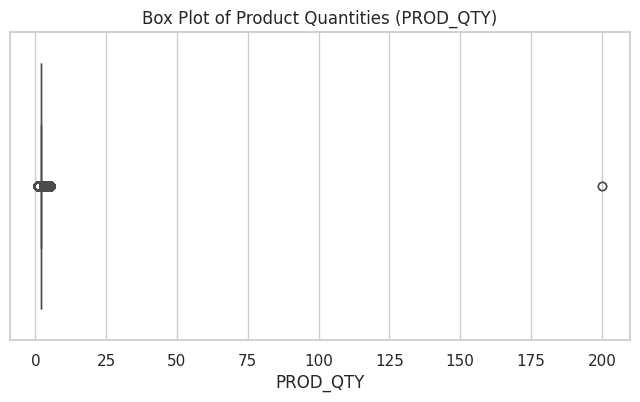

In [ ]:
# Checking for outliers in product quantity
plt.figure(figsize=(8,4))
sns.boxplot(x=transactions['PROD_QTY'])
plt.title("Box Plot of Product Quantities (PROD_QTY)")
plt.xlabel("PROD_QTY")
plt.show()

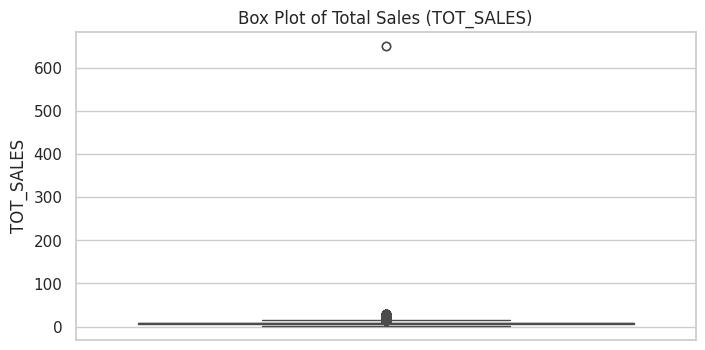

In [ ]:
# Checking for outliers in Total Sales
sns.boxplot(transactions.TOT_SALES)
plt.title("Box Plot of Total Sales (TOT_SALES)")
plt.show()

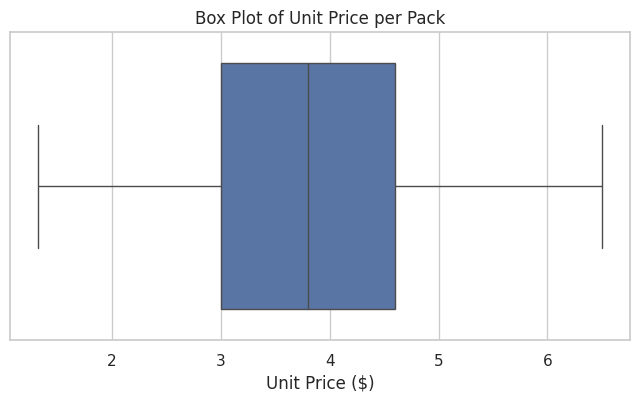

In [ ]:
transactions['UNIT_PRICE'] = transactions['TOT_SALES'] / transactions['PROD_QTY']

plt.figure(figsize=(8,4))
sns.boxplot(x=transactions['UNIT_PRICE'])
plt.title("Box Plot of Unit Price per Pack")
plt.xlabel("Unit Price ($)")
plt.show()

In [ ]:
transactions.sort_values('TOT_SALES', ascending=False).head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,UNIT_PRICE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.00,3.25
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.00,3.25
150683,2019-05-20,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.50,5.90
5179,2018-08-15,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.50,5.90
55558,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.50,5.90


**Data Cleaning:**

In [ ]:
# Removing impossible quantities
transactions = transactions[transactions['PROD_QTY'] > 0]

# Removing the two 200-quantity outliers
transactions = transactions[transactions['PROD_QTY'] < 200]

In [ ]:
transactions.sort_values('TOT_SALES', ascending=False).head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,UNIT_PRICE
5179,2018-08-15,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.50,5.90
171815,2018-08-17,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.50,5.90
55558,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.50,5.90
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.50,5.90
184969,2019-05-20,44,44350,40394,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.50,5.90


**Deriving extra features such as pack size and brand name:**

In [ ]:
# PACK_SIZE: number before 'g' in the product name
transactions['PACK_SIZE'] = (
    transactions['PROD_NAME']
    .str.extract(r'(\d+)[gG]', expand=False)
    .astype(int)
)

# BRAND: first word in the product name
transactions['BRAND'] = transactions['PROD_NAME'].str.split().str[0]

transactions[['PROD_NAME', 'BRAND', 'PACK_SIZE']].head()
print("\nPack size distribution:")
print(transactions['PACK_SIZE'].value_counts().sort_index().head(20))

print("\nTop brands:")
print(transactions['BRAND'].value_counts().head(10))


Pack size distribution:
PACK_SIZE
70      1507
90      3008
110    22387
125     1454
134    25102
135     3257
150    43131
160     2970
165    15297
170    19983
175    66390
180     1468
190     2995
200     4473
210     6272
220     1564
250     3169
270     6285
300    15166
330    12540
Name: count, dtype: int64

Top brands:
BRAND
Kettle       41288
Smiths       28860
Pringles     25102
Doritos      24962
Thins        14075
RRD          11894
Infuzions    11057
WW           10320
Cobs          9693
Tostitos      9471
Name: count, dtype: int64


**Merging the Data:**

In [ ]:
data = transactions.merge(customers, on='LYLTY_CARD_NBR', how='inner')
print("Merged shape:", data.shape)
data.head()

Merged shape: (264834, 13)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,UNIT_PRICE,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00,3.00,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30,2.10,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90,1.45,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00,3.00,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,4.60,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


**Total Sales Ordered Based On Customer Segements:**



In [ ]:
segment_metrics = (
    data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])
        .agg(
            total_sales=('TOT_SALES', 'sum'),
            total_units=('PROD_QTY', 'sum'),
            num_customers=('LYLTY_CARD_NBR', 'nunique'),
            num_transactions=('TXN_ID', 'nunique')
        )
        .reset_index()
)

segment_metrics['avg_spend_per_customer'] = (
    segment_metrics['total_sales'] / segment_metrics['num_customers']
)

segment_metrics['avg_units_per_customer'] = (
    segment_metrics['total_units'] / segment_metrics['num_customers']
)

segment_metrics['avg_spend_per_transaction'] = (
    segment_metrics['total_sales'] / segment_metrics['num_transactions']
)

segment_metrics['avg_units_per_transaction'] = (
    segment_metrics['total_units'] / segment_metrics['num_transactions']
)

segment_metrics['avg_price_per_unit'] = (
    segment_metrics['total_sales'] / segment_metrics['total_units']
)

segment_metrics['txns_per_customer'] = (
    segment_metrics['num_transactions'] / segment_metrics['num_customers']
)

segment_metrics['segment'] = (
    segment_metrics['LIFESTAGE'] + " - " + segment_metrics['PREMIUM_CUSTOMER']
)

### **Insights for Task 1:**

**Which customer segments contribute most to chip sales?**

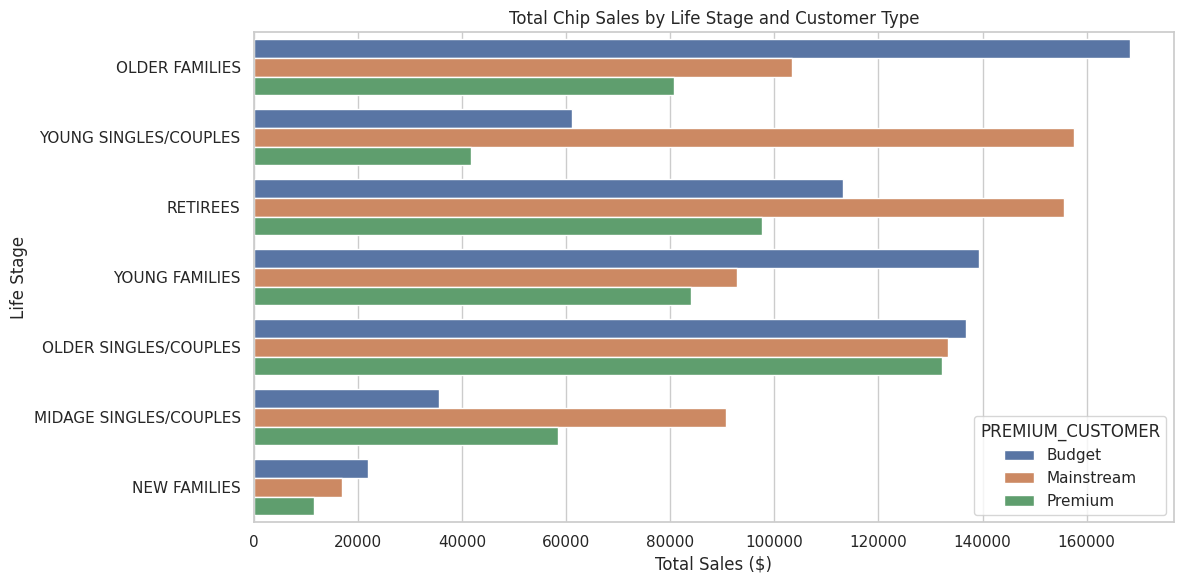

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=segment_metrics.sort_values('total_sales', ascending=False),
    x='total_sales',
    y='LIFESTAGE',
    hue='PREMIUM_CUSTOMER'
)
plt.title("Total Chip Sales by Life Stage and Customer Type")
plt.ylabel("Life Stage")
plt.xlabel("Total Sales ($)")
plt.tight_layout()
plt.show()

In [ ]:
# Interactive version
segment_sorted = segment_metrics.sort_values('total_sales', ascending=False)

fig = px.bar(
    segment_sorted,
    x="total_sales",
    y="LIFESTAGE",
    color="PREMIUM_CUSTOMER",
    orientation="h",
    hover_data=[
        "total_sales"
    ],
    title="Total Chip Sales by Life Stage and Customer Type",
    labels={
        "total_sales": "Total Sales ($)",
        "LIFESTAGE": "Life Stage",
        "PREMIUM_CUSTOMER": "Customer Type"
    }
)

fig.update_layout(
    height=600,
    width=1000,
    yaxis=dict(categoryorder="total ascending")
)

fig.show()

**Observation:**

Chip sales are strongly driven by mature households, especially Older Families, Retirees, and Older Singles or Couples across all customer types. These groups show stable and high purchase levels, making them the core revenue drivers for the category.

Younger Families and New Families contribute much less, which signals an opportunity for targeted marketing or family value packs to expand category reach and attract new loyal shoppers.

**Is higher spend driven by more customers?**

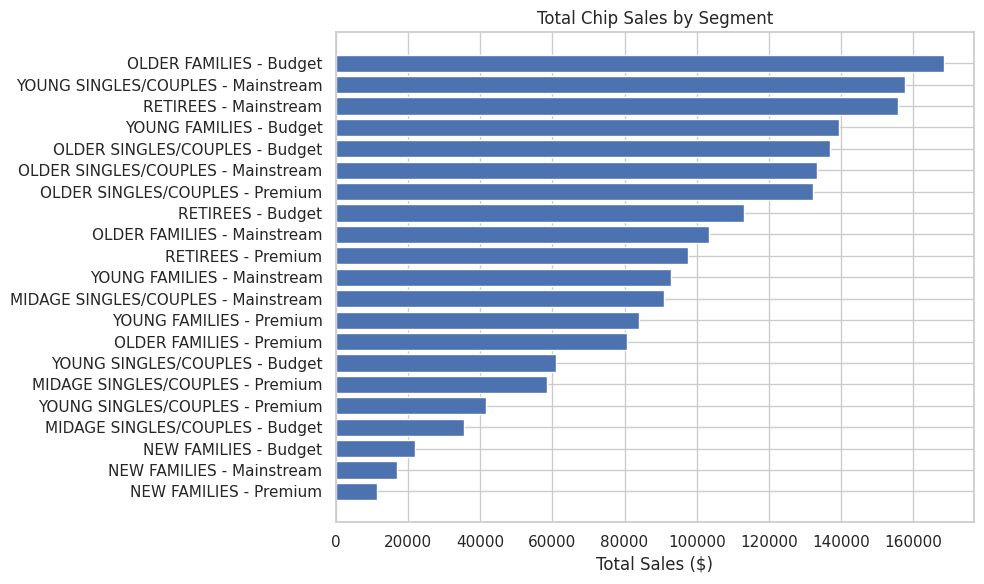

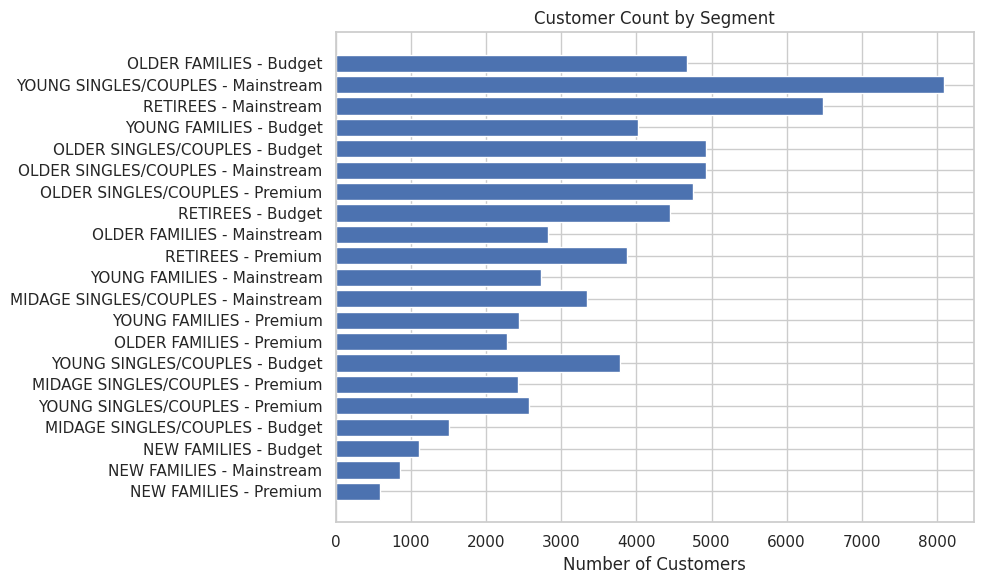

In [ ]:
seg_sorted = segment_metrics.sort_values('total_sales', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(seg_sorted['segment'], seg_sorted['total_sales'])
plt.gca().invert_yaxis()  # highest value at top
plt.xlabel('Total Sales ($)')
plt.title('Total Chip Sales by Segment')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(seg_sorted['segment'], seg_sorted['num_customers'])
plt.gca().invert_yaxis()
plt.xlabel('Number of Customers')
plt.title('Customer Count by Segment')
plt.tight_layout()
plt.show()

**Observation:**

The segments with the highest chip spend (Older Families - Budget, Young Singles/Couples - Mainstream, Retirees - Mainstream) are also the segments with the largest number of customers. Conversely, segments with low chip sales have much smaller customer bases. This shows that **higher total chip sales are primarily driven by having more customers in the segment**, rather than unusually high spend per customer.

**Is higher spend driven by more units per customer?**

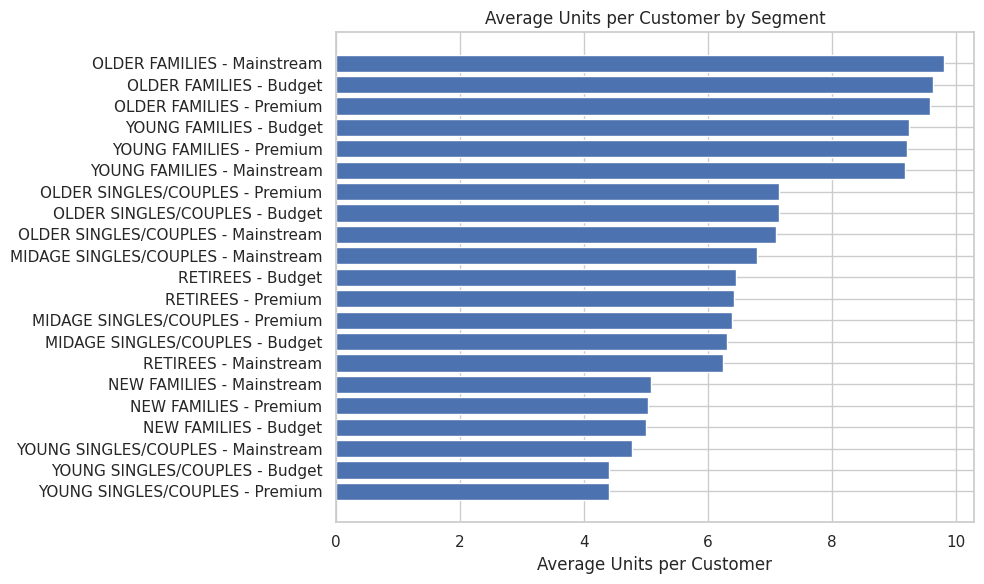

In [ ]:
seg_units_cust = segment_metrics.sort_values('avg_units_per_customer', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(seg_units_cust['segment'], seg_units_cust['avg_units_per_customer'])
plt.gca().invert_yaxis()  # highest value at top
plt.xlabel('Average Units per Customer')
plt.title('Average Units per Customer by Segment')
plt.tight_layout()
plt.show()


**Observation:**

Higher spend is partly driven by customers in certain lifestages buying more units, especially older and family-based segments. This reveals that **basket size (quantity bought per customer) is a key driver of spend**, not just customer count.

**Is higher spend driven by more transactions per customer?**

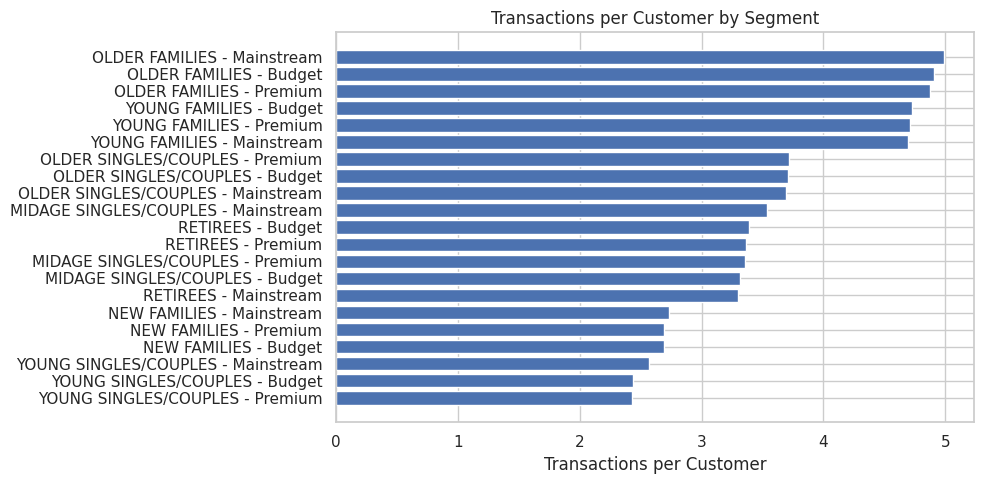

In [ ]:
seg_txns_cust = segment_metrics.sort_values('txns_per_customer', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(seg_txns_cust['segment'], seg_txns_cust['txns_per_customer'])
plt.gca().invert_yaxis()
plt.xlabel('Transactions per Customer')
plt.title('Transactions per Customer by Segment')
plt.tight_layout()
plt.show()

**Observation:**

**Higher spend is not driven by more transactions per customer.** Customer visit frequency is fairly consistent across all segments. The real driver of spend is what customers put in their basket, not how often they shop.

**Is higher spend driven by higher price per pack?**

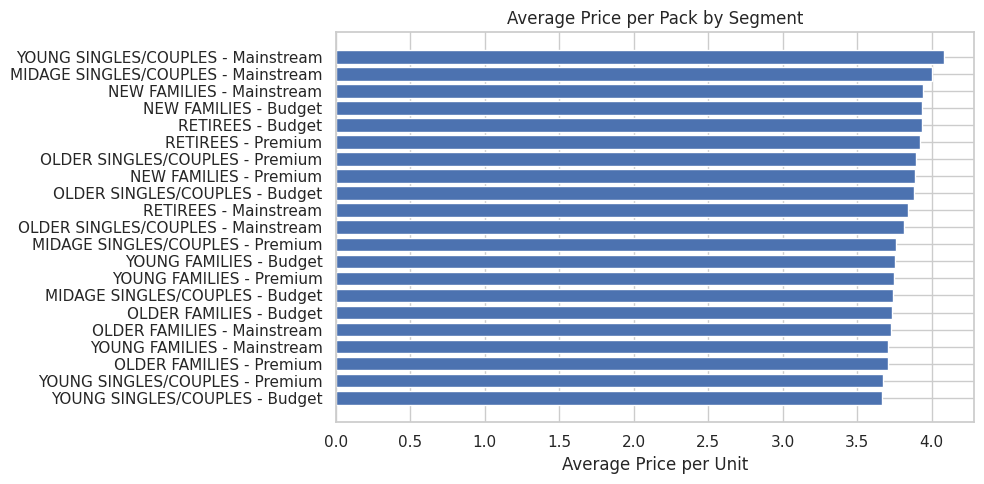

In [ ]:
seg_price = segment_metrics.sort_values('avg_price_per_unit', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(seg_price['segment'], seg_price['avg_price_per_unit'])
plt.gca().invert_yaxis()
plt.xlabel('Average Price per Unit')
plt.title('Average Price per Pack by Segment')
plt.tight_layout()
plt.show()

**Observation:**

No customer group is paying noticeably more for chips. Higher revenue comes from people buying more packs, not paying higher prices.

#### **Overall Recommendation for Chip Category Manager:**

Chip sales are mainly **driven by mature households, especially Older Families, Retirees, and Older Singles or Couples**, and this is because there are more customers in these segments and they buy more units per customer.

**Transaction frequency and price per pack are quite similar across segments**, so discounting prices or trying to increase visit frequency is unlikely to move the needle much.

The most effective strategy is to focus space, range, and promotions on the life stages that already drive the bulk of revenue, and encourage them to put more packs in the basket through multipacks, bulk offers, and bundled deals.

At the same time, **New Families and some younger segments are underdeveloped**, so targeted family offers and kid friendly pack sizes can be used to grow penetration without relying on heavy price cuts.


In short, protect and grow the core older segments with strong availability and compelling bundle offers, while using focused marketing and pack strategy to slowly build chip habits in younger families.

### **Task 2: Experimentation and uplift testing**

**Data Loading:**

In [ ]:
qvi_data = pd.read_csv('QVI_data.csv')

**Data Exploration:**

In [ ]:
qvi_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.00,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.70,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.60,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.00,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.90,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [ ]:
qvi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [ ]:
# Prepare datetime fields for monthly aggregation
qvi_data['DATE'] = pd.to_datetime(qvi_data['DATE'])
qvi_data['MONTH'] = qvi_data['DATE'].dt.to_period('M')

**Monthly Sales and Customer Metrics by Store:**

In [ ]:
store_month = (
    qvi_data
    .groupby(['STORE_NBR', 'MONTH'])
    .agg(
        total_sales=('TOT_SALES', 'sum'),
        customers=('LYLTY_CARD_NBR', 'nunique'),
        transactions=('TXN_ID', 'nunique')
    )
    .reset_index()
)

store_month['trans_per_cust'] = (
    store_month['transactions'] / store_month['customers'])
store_month.head()

,STORE_NBR,MONTH,total_sales,customers,transactions,trans_per_cust
0,1,2018-07,206.90,49,52,1.06
1,1,2018-08,176.10,42,43,1.02
2,1,2018-09,278.80,59,62,1.05
3,1,2018-10,188.10,44,45,1.02
4,1,2018-11,192.60,46,47,1.02


In [ ]:
# Define the pre-trial period used as the baseline for comparison
pre_trial_start = pd.Timestamp('2018-07-01')
pre_trial_end   = pd.Timestamp('2019-02-03')

In [ ]:
# Filter monthly metrics to include only pre-trial months for control store selection
store_month_pretrial = store_month[
    store_month['MONTH'].dt.to_timestamp() <= pre_trial_end
]

**Identifying Most Similar Control Stores for Each Trial Store:**

In [ ]:
trial_stores = [77, 86, 88]

def find_control_candidates(store_month, trial_store, metric_cols):
    """
    For a given trial_store, find the most similar control stores based on
    monthly trends of the selected metric_cols.

    Similarity is measured as the average Pearson correlation between
    the trial store and each candidate store across the specified metrics.
    """
    sims = []

    # 1. Get monthly metrics for the trial store
    trial = (
        store_month[store_month['STORE_NBR'] == trial_store]
        .set_index('MONTH')[metric_cols]
        .sort_index()
    )

    # 2. Loop through every candidate store
    for store in store_month['STORE_NBR'].unique():
        # Skip itself
        if store == trial_store:
            continue
        # Skip other trial stores as controls
        if store in trial_stores:
            continue

        # 3. Get monthly metrics for the candidate control store
        control = (
            store_month[store_month['STORE_NBR'] == store]
            .set_index('MONTH')[metric_cols]
            .sort_index()
        )

        # 4. Align on common months
        joined = trial.join(control, how='inner', lsuffix='_trial', rsuffix='_ctrl')

        # Require a minimum number of overlapping months
        if len(joined) < 6:
            continue

        corr_values = []

        # 5. Compute correlation for each metric
        for m in metric_cols:
            x = joined[f'{m}_trial']
            y = joined[f'{m}_ctrl']

            # If one series is constant, correlation is not meaningful
            if x.std() == 0 or y.std() == 0:
                continue

            corr_values.append(x.corr(y))  # Pearson by default

        # If we got no valid correlation values, skip this store
        if not corr_values:
            continue

        # 6. Average correlation across metrics = similarity score
        sims.append({
            'trial_store': trial_store,
            'control_store': store,
            'similarity': np.mean(corr_values)
        })

    # 7. Return all candidates, sorted by similarity (highest first)
    sims_df = pd.DataFrame(sims)
    return sims_df.sort_values('similarity', ascending=False)

In [ ]:
metric_cols = ['total_sales', 'customers', 'trans_per_cust']

control_77 = find_control_candidates(store_month, 77, metric_cols)
control_86 = find_control_candidates(store_month, 86, metric_cols)
control_88 = find_control_candidates(store_month, 88, metric_cols)

print(control_77.head())
print("\n",control_86.head())
print("\n",control_88.head())

     trial_store  control_store  similarity
158           77            167        0.52
106           77            115        0.51
68            77             71        0.48
61            77             64        0.48
38            77             41        0.48

      trial_store  control_store  similarity
150           86            159        0.60
138           86            147        0.49
247           86            260        0.47
20            86             22        0.46
167           86            176        0.45

      trial_store  control_store  similarity
150           88            159        0.62
191           88            201        0.62
11            88             13        0.51
169           88            178        0.50
182           88            191        0.47


**Control store selection:**

For each trial store (77, 86, 88), we found a similar control store by comparing monthly trends in:

1. Total sales

2. Number of customers

3. Transactions per customer

The closest matches were:

1. Store 77 -> Control 167

2. Store 86 -> Control 159

3. Store 88 -> Control 201

These control stores behave similarly to the trial stores before the layout change, so they give us a good baseline to compare against.

In [ ]:
# Convert DATE column to datetime
qvi_data['DATE'] = pd.to_datetime(qvi_data['DATE'])

# Define the pre-trial and trial date ranges
pre_trial_start = pd.Timestamp('2018-07-01')
pre_trial_end   = pd.Timestamp('2019-02-03')
trial_start     = pd.Timestamp('2019-02-04')
trial_end       = pd.Timestamp('2019-04-28')

# Label each transaction as pre-trial, trial, or other
def label_period(d):
    if pre_trial_start <= d <= pre_trial_end:
        return 'pre_trial'
    elif trial_start <= d <= trial_end:
        return 'trial'
    else:
        return 'other'
qvi_data['period'] = qvi_data['DATE'].apply(label_period)

# Create a weekly time bucket used for weekly comparisons
qvi_data['week'] = qvi_data['DATE'].dt.to_period('W').apply(lambda r: r.start_time)

**Computing Weekly Performance Metrics for a Store:**

In [ ]:
def store_weekly_metrics(data, store_nbr):
    """
    Aggregates weekly metrics for a single store.
    Metrics:
    - total_sales
    - customers (unique cards)
    - transactions
    - trans_per_cust
    """
    df = (
        data[data['STORE_NBR'] == store_nbr]
        .groupby(['week', 'period'])
        .agg(
            total_sales=('TOT_SALES', 'sum'),
            customers=('LYLTY_CARD_NBR', 'nunique'),
            transactions=('TXN_ID', 'nunique')
        )
        .reset_index()
    )
    df['trans_per_cust'] = df['transactions'] / df['customers']
    df['STORE_NBR'] = store_nbr
    return df

In [ ]:
store_weekly_metrics(qvi_data, 77).head()

,week,period,total_sales,customers,transactions,trans_per_cust,STORE_NBR
0,2018-06-25,pre_trial,15.60,2,2,1.00,77
1,2018-07-02,pre_trial,57.50,13,13,1.00,77
2,2018-07-09,pre_trial,52.80,10,10,1.00,77
3,2018-07-16,pre_trial,106.50,18,19,1.06,77
4,2018-07-23,pre_trial,46.00,8,8,1.00,77


**Comparing Store Performance Before and During the Layout Trial:**

In [ ]:
def pre_vs_trial_change(weekly_df, store_nbr):
    """
    For a given store, compute % change from pre_trial to trial
    for total_sales, customers, transactions, trans_per_cust.
    """
    sub = weekly_df[
        (weekly_df['STORE_NBR'] == store_nbr) &
        (weekly_df['period'].isin(['pre_trial', 'trial']))
    ]

    agg = (
        sub.groupby('period')
        .agg(
            total_sales=('total_sales', 'sum'),
            customers=('customers', 'sum'),
            transactions=('transactions', 'sum')
        )
    )
    agg['trans_per_cust'] = agg['transactions'] / agg['customers']

    pre = agg.loc['pre_trial']
    trl = agg.loc['trial']

    change_pct = (trl - pre) / pre * 100.0  # % change
    return change_pct

**Checking If the Trial Store Performed Better Than Its Control Store:**

In [ ]:
def compare_trial_control(qvi_data, trial_store, control_store):
    """
    Build weekly metrics for trial and control store,
    compute pre→trial % changes, and then incremental impact
    (trial change - control change).
    """
    trial_weekly   = store_weekly_metrics(qvi_data, trial_store)
    control_weekly = store_weekly_metrics(qvi_data, control_store)

    pair_weekly = pd.concat([trial_weekly, control_weekly], ignore_index=True)

    trial_change   = pre_vs_trial_change(pair_weekly, trial_store)
    control_change = pre_vs_trial_change(pair_weekly, control_store)

    impact = trial_change - control_change  # incremental uplift

    summary = {
        'trial_store': trial_store,
        'control_store': control_store,

        'trial_delta_sales_%':   trial_change['total_sales'],
        'control_delta_sales_%': control_change['total_sales'],
        'incremental_sales_%':   impact['total_sales'],

        'trial_delta_customers_%':   trial_change['customers'],
        'control_delta_customers_%': control_change['customers'],
        'incremental_customers_%':   impact['customers'],

        'trial_delta_tpc_%':   trial_change['trans_per_cust'],
        'control_delta_tpc_%': control_change['trans_per_cust'],
        'incremental_tpc_%':   impact['trans_per_cust'],
    }
    return summary

**Final Comparison Table: Trial Stores vs Controls**

Using weekly data, we compared pre-trial vs trial performance for each trial - control pair and calculated incremental uplift (trial % change - control % change)

In [ ]:
control_map = {
    77: 167,   # from your similarity table
    86: 159,
    88: 201
}

rows = []
for t, c in control_map.items():
    rows.append(compare_trial_control(qvi_data, t, c))

summary_df = pd.DataFrame(rows)
summary_df

,trial_store,control_store,trial_delta_sales_%,control_delta_sales_%,incremental_sales_%,trial_delta_customers_%,control_delta_customers_%,incremental_customers_%,trial_delta_tpc_%,control_delta_tpc_%,incremental_tpc_%
0,77,167,-57.76,-62.34,4.58,-56.56,-61.97,5.40,-1.23,-0.97,-0.26
1,86,159,-57.75,-43.45,-14.30,-56.99,-47.37,-9.62,-0.72,0.00,-0.72
2,88,201,-58.63,-57.54,-1.08,-60.00,-57.47,-2.53,2.65,-0.90,3.55


1. Store 77 performed better than its control during the trial. The uplift is mainly driven by more purchasing customers, not by customers shopping more often. **The new layout appears to be successful for Store 77.**

2. Store 86 performed much worse than its control. It lost more customers and those who did shop made fewer trips compared to the control store. **For Store 86, the new layout appears to have a negative impact.**

3. Store 88 is close to neutral overall. Slightly fewer customers than the control store, but existing customers are making more trips.
Net effect on sales is small and slightly negative. **The layout impact for Store 88 is inconclusive/mixed.**

**Significance Test for Trial vs Control Stores:**

In [ ]:
def trial_significance(qvi_data, trial_store, control_store):
    trial_w = store_weekly_metrics(qvi_data, trial_store)
    ctrl_w  = store_weekly_metrics(qvi_data, control_store)

    t_trial = trial_w[trial_w['period'] == 'trial']['total_sales']
    t_ctrl  = ctrl_w[ctrl_w['period'] == 'trial']['total_sales']

    t_stat, p_val = ttest_ind(t_trial, t_ctrl, equal_var=False)
    return t_stat, p_val

for t, c in control_map.items():
    t_stat, p_val = trial_significance(qvi_data, t, c)
    print(f"Store {t} vs {c}: t={t_stat:.2f}, p={p_val:.3f}")

Store 77 vs 167: t=3.11, p=0.006
Store 86 vs 159: t=14.93, p=0.000
Store 88 vs 201: t=2.80, p=0.011


#### **Overall recommendation for the trial layout:**

**Store 77:** Positive and statistically significant uplift -> good candidate for rollout to similar stores.

**Store 86:** Clearly negative and significant impact -> do not roll out layout to stores similar to 86 without changes.

**Store 88:** Mixed/near-neutral impact -> can be used as supporting evidence, but not strong enough on its own to justify rollout.

**High-level recommendation:**

*   The trial results are not uniformly positive across all locations.
*   The new layout seems to work well in some stores (like 77) but not in others (like 86).

The layout should be:
*   Rolled out to stores that are similar to Store 77, where it has shown a positive effect.

*   Reviewed or adjusted before being applied to stores similar to Store 86.
*  Monitored closely in “borderline” stores like 88 where the impact is small.






In [ ]:
# Filter only trial period & only store 77
store_77_trial = qvi_data[
    (qvi_data['STORE_NBR'] == 77) &
    (qvi_data['period'] == 'trial')
]

# Group by brand and calculate total sales + units sold
brand_sales_77 = (
    store_77_trial.groupby('BRAND')
        .agg(
            total_sales=('TOT_SALES', 'sum'),
            units_sold=('PROD_QTY', 'sum'),
            transactions=('TXN_ID', 'nunique')
        )
        .reset_index()
        .sort_values('total_sales', ascending=False)
)

brand_sales_77

,BRAND,total_sales,units_sold,transactions
14,SMITHS,131.10,40,26
9,KETTLE,99.00,21,13
12,PRINGLES,59.20,16,10
13,RRD,57.90,21,12
5,DORITOS,50.60,11,8
16,THINS,46.20,14,8
10,NATURAL,33.00,11,8
20,WOOLWORTHS,32.40,18,10
11,OLD,30.60,6,4
8,INFUZIONS,30.40,8,5


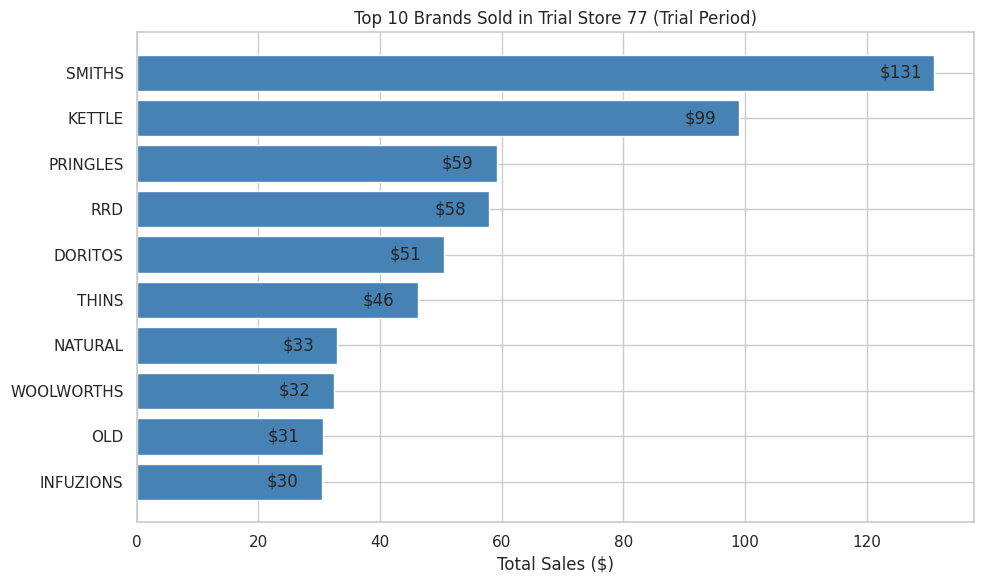

In [ ]:
top10 = brand_sales_77.head(10)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top10['BRAND'], top10['total_sales'], color='steelblue')
plt.gca().invert_yaxis()  # highest at top
plt.xlabel("Total Sales ($)")
plt.title("Top 10 Brands Sold in Trial Store 77 (Trial Period)")

for bar in bars:
    width = bar.get_width()
    plt.text(
        width - 9,                     # x position
        bar.get_y() + bar.get_height()/2,
        f"${width:,.0f}",              # label text
        va='center'
    )

plt.tight_layout()
plt.show()

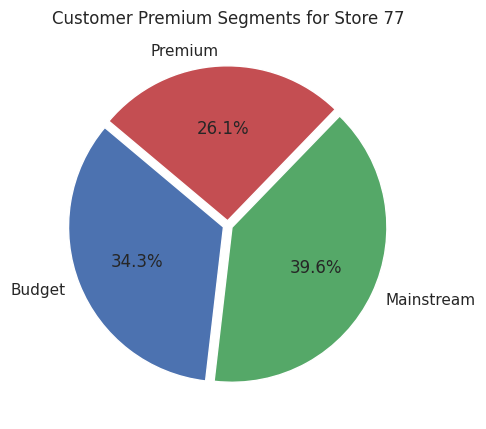

In [ ]:
# Filter data for Store 77
store_77 = qvi_data[qvi_data['STORE_NBR'] == 77]

# Count customers by premium category
premium_counts = store_77.groupby('PREMIUM_CUSTOMER')['LYLTY_CARD_NBR'].nunique()

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    premium_counts,
    labels=premium_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=[0.03]*len(premium_counts),
    colors=['#4C72B0', '#55A868', '#C44E52']
)

plt.title("Customer Premium Segments for Store 77")
plt.tight_layout()
plt.show()